# Tutorial - SymPy in 10 minutes

In this tutorial we will learn the basics of [Jupyter](http://jupyter.org/) and [SymPy](https://es.wikipedia.org/wiki/SymPy). SymPy is a Python library for symbolic computation. It provides computer algebra capabilities either as a standalone application, as a library to other applications, or live on the web as [SymPy Live](http://live.sympy.org/) or [SymPy Gamma](http://www.sympygamma.com/). Sympy is similar to other CAS (Computer Algebra Software) like Mathematica, Maple or Maxima.

A more complete tutorial can be found at [http://docs.sympy.org/latest/tutorial/index.html](http://docs.sympy.org/latest/tutorial/index.html).

Before using SymPy we should load it, like any other Python libary. We will use ``init_session()`` to make some imports, this will help us in its interactive use.

In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


Let us start with some simple calculations. Belowe we have a _code cell_ with an addition. Place the cursor on it and press SHIFT + ENTER to evaluate it.

In [2]:
1 + 3

Let us make some calculations

In [3]:
factorial(5)

In [4]:
Out[2]* 10

In [5]:
1 // 3

In [6]:
1 / 3

In [7]:
S(1) / 3

We can evaluate an expression to its floating point version

In [8]:
sqrt(2*pi)

In [9]:
float(Out[7])

In the previous line we used the expression **Out[7]** that stores the output from the evaluation in cell 7 (In[7]). We can also store expressions as variables, just as any Python variable.

In [10]:
radius = 10
height = 100
area = pi * radius**2
volume = area * height

In [11]:
volume

In [12]:
float(volume)

So far, we have just used SymPy as a calculator. Let us try more advanced calculations



Definite and indefinite integrals

In [13]:
integrate(sin(x), x)

In [14]:
integrate(sin(x), (x, 0, pi))

We can define a function and integrate it

In [15]:
f = lambda x: x**2 + 5

In [16]:
f(5)

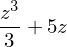

In [17]:
integrate(f(z), z)

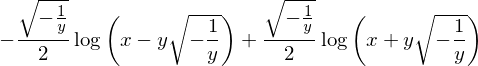

In [18]:
integrate(1/(x**2 + y), x)

If we assume that the denominator is positive, the expression can be factorized further


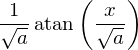

In [19]:
a = symbols("a", positive=True)
integrate(1/(x**2 + a), x)

We just learnt the basics, we can try some examples now.

**Note:** If you want to know more about a specific function you can use ``help()`` or the IPython magic command ``??``

In [20]:
help(integrate)

Help on function integrate in module sympy.integrals.integrals:

integrate(*args, **kwargs)
    integrate(f, var, ...)
    
    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.
    
    var can be:
    
    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with `a` replacing `symbol`
    - a tuple (symbol, a, b)     -- definite integration
    
    Several variables can be specified, in which case the result is
    multiple integration. (If var is omitted and the integrand is
    univariate, the indefinite integral in that variable will be performed.)
    
    Indefinite integrals are returned without terms that are indep

In [21]:
integrate??

## Examples

### Solving algebraic equations

We can solve equations using ``solveset``:

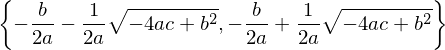

In [22]:
a, b, c = symbols("a b c")
solveset(a*x**2 + b*x + c, x)

We should enter the equations as equated to 0, or as an equation

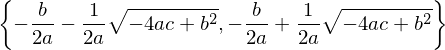

In [23]:
solveset(Eq(a*x**2 + b*x, -c), x)

### Linear Algebra

We use ``Matrix`` to create matrices. Matrices can contain expressions. And we use the method ``.inv()`` to compute the inverse and ``*`` to multiply matrices.

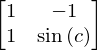

In [24]:
A = Matrix([
        [1, -1],
        [1, sin(c)]
    ])
display(A)

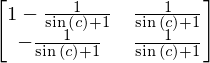

In [25]:
B = A.inv()
display(B)

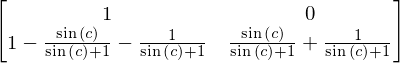

In [26]:
A * B

This should be the identity matrix, let us simplify the expression. There are several simplification functions, and ``simplify`` is the most general one. Simplifying is a complicated matter... if you are uncertain; use ``simplify``.

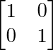

In [27]:
simplify(A * B)

### Plotting

We can make 2D and 3D plots

In [28]:
%matplotlib inline
from sympy.plotting import plot3d

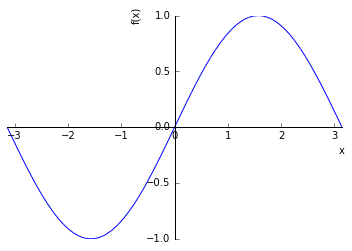

In [29]:

plot(sin(x), (x, -pi, pi));

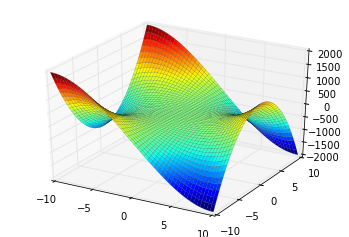

In [30]:
monkey_saddle = x**3 - 3*x*y**2
p = plot3d(monkey_saddle)

### Derivatives and differential equations

We can use the function ``diff`` or the method ``.diff()`` to compute derivatives.

In [31]:
f = lambda x: x**2

In [32]:
diff(f(x), x)

In [33]:
f(x).diff(x)

In [34]:
g = lambda x: sin(x)

In [35]:
diff(g(f(x)), x)

Yes, SymPy knows about the chain rule.

To finish, let us solve a second order ODE

$$ u''(t) + \omega^2 u(t) = 0$$

In [36]:
u = symbols("u", cls=Function)
omega = symbols("omega", positive=True)

In [37]:
ode = u(t).diff(t, 2) + omega**2 * u(t)
dsolve(ode, u(t))

The following cell change the style of the notebook.

In [38]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()